<a href="https://colab.research.google.com/github/AbdulWahabRaza123/FYP_ML/blob/main/1)FYPImportDataAndResizeImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raza12","key":"734272987ec6ad5c7cb9f58a2be51db7"}'}

In [ ]:
#creating kaggle folder
!mkdir ~/.kaggle/

In [ ]:
#copying the kaggle.json file into the folder which we created
!cp kaggle.json ~/.kaggle/

In [ ]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d raddar/chest-xrays-indiana-university

100% 13.2G/13.2G [09:25<00:00, 28.0MB/s]
100% 13.2G/13.2G [09:25<00:00, 25.0MB/s]


In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse

^C


In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

/content
mkdir: cannot create directory ‘drive’: File exists
/content/drive
mkdir: cannot create directory ‘MyDrive’: File exists
/content
/
^C


In [ ]:
#Connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
!unzip /content/chest-xrays-indiana-university.zip -d /content/drive/MyDrive

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/images/images_normalized/219_IM-0799-1001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/219_IM-0799-2001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/21_IM-0729-1001-0001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/21_IM-0729-1001-0002.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2200_IM-0811-1001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2200_IM-0811-2001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2201_IM-0811-1002.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2202_IM-0811-1001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2202_IM-0811-1002.dcm.png  
  inflating: /content/drive/MyDrive/images/images_normalized/2203_IM-0812-1001.dcm.png  
  inflating: /content/drive/MyDrive/images/images_norma

In [98]:
#import libraries
import numpy as np
import pandas as pd

In [99]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [100]:
import pandas as pd 
import cv2
import numpy as np
import os
from glob import glob
import math
import matplotlib.pyplot as plt
import re
import html
import string
import unicodedata
from nltk.tokenize import word_tokenize

In [101]:
df  =pd.read_csv("/content/drive2/MyDrive/indiana_reports.csv")
df.head(5)

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [102]:
len(df[df['Problems'] == 'normal'])/len(df)

0.3580888081017917

In [103]:
df['findings'].iloc[0:5].tolist()

['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.',
 'Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX.',
 nan,
 'There are diffuse bilateral interstitial and alveolar opacities consistent with chronic obstructive lung disease and bullous emphysema. There are irregular opacities in the left lung apex, that could represent a cavitary lesion in the left lung apex.There are streaky opacities in the right upper lobe, XXXX scarring. The cardiomediastinal silhouette is normal in size and contour. There is no pneumothorax or large pleural effusion.',
 'The cardiomediastinal silhouette and pulmonary vasculature are within normal limits. There is no pneumothorax or pleural effusion. There are no focal areas of consolidation. Cholecystectomy clips are present. Small T-s

In [104]:
print(df.shape)
df['impression'].unique().shape

(3851, 8)


(1771,)

In [105]:
df['MeSH'].unique().tolist()[:5]

['normal',
 'Cardiomegaly/borderline;Pulmonary Artery/enlarged',
 'Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis/interstitial;Cicatrix/lung/upper lobe/left;Opacity/lung/apex/left/irregular;Opacity/lung/upper lobe/right/streaky;Opacity/pulmonary alveoli;Opacity/lung/bilateral/interstitial/diffuse',
 'Osteophyte/thoracic vertebrae/multiple/small;Thickening/pleura/apex/bilateral;Lung/hyperdistention/mild',
 'Pulmonary Atelectasis/base;Spondylosis/thoracic vertebrae;Arthritis/cervical vertebrae']

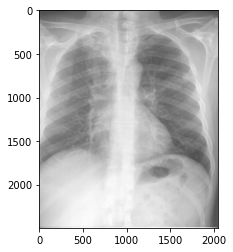

In [106]:
img = cv2.imread('/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-3001.dcm.png')
plt.imshow(img)
plt.show()

In [107]:
df2 = pd.read_csv("/content/drive2/MyDrive/indiana_projections.csv")
df2.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [108]:
import tensorflow as tf

In [109]:
#reading images path
images=tf.data.Dataset.list_files('/content/drive2/MyDrive/images/images_normalized/*',shuffle=False)

In [110]:
#showing images path
for file in images.take(5):
  print(file.numpy())

b'/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-1001.dcm.png'
b'/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-2001.dcm.png'
b'/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-3001.dcm.png'
b'/content/drive2/MyDrive/images/images_normalized/1001_IM-0004-1001.dcm.png'
b'/content/drive2/MyDrive/images/images_normalized/1001_IM-0004-1002.dcm.png'


In [111]:
projections=["frontal","laterl"]

In [112]:
df2.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [113]:
len(df2)

7466

In [114]:
df2['filename'].head(2)

0    1_IM-0001-4001.dcm.png
1    1_IM-0001-3001.dcm.png
Name: filename, dtype: object

In [138]:
#getting label of images
def get_label(file_path):
  import os
  return tf.strings.split(file_path,os.path.sep)[-1]

In [116]:
#readiing image from path
def process_image(file_path):
  label=get_label(file_path)
  img=tf.io.read_file(file_path)
  img=tf.image.decode_jpeg(img)
  img=tf.image.resize(img,[128,128])
  return img,label

In [117]:
#resize image to reduce size of image
def resize_image(file_path):
  img=tf.io.read_file(file_path)
  img=tf.image.decode_jpeg(img)
  img=tf.image.resize(img,[128,128])
  return img

In [118]:
#train_ds are file paths
for t in images.take(4):
  print(t.numpy().decode('utf=8'))

/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-1001.dcm.png
/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-2001.dcm.png
/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-3001.dcm.png
/content/drive2/MyDrive/images/images_normalized/1001_IM-0004-1001.dcm.png


In [119]:
import cv2
from google.colab.patches import cv2_imshow

In [153]:
img=[]
for t in images:
  temp_img=cv2.imread(t.numpy().decode('utf-8'))
  temp_img=cv2.resize(temp_img,(128,128))
  img.append(temp_img)

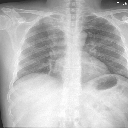

In [154]:
cv2_imshow(img[0])

In [128]:
temp_pathname=[]
for t in images.take(5):
  temp_pathname.append(t.numpy().decode('utf=8'))

In [129]:
temp_pathname

['/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-1001.dcm.png',
 '/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-2001.dcm.png',
 '/content/drive2/MyDrive/images/images_normalized/1000_IM-0003-3001.dcm.png',
 '/content/drive2/MyDrive/images/images_normalized/1001_IM-0004-1001.dcm.png',
 '/content/drive2/MyDrive/images/images_normalized/1001_IM-0004-1002.dcm.png']

In [144]:
store_img_path=[]
for label in images.map(get_label):
  store_img_path.append(label.numpy().decode('utf-8'))

In [145]:
len(store_img_path)

7470

In [156]:
for i in range(0,len(store_img_path)):
  cv2.imwrite(f'/content/drive/MyDrive/FYP/images/{store_img_path[i]}',img[i])

In [149]:
print(f"Hello World {5}")

Hello World 5


In [150]:
yo=cv2.imread(f"/content/drive2/MyDrive/images/images_normalized/{store_img_path[0]}")

In [155]:
store_img_path[0]

'1000_IM-0003-1001.dcm.png'

In [157]:
!cp /content/drive2/MyDrive/indiana_projections.csv /content/drive/MyDrive/FYP

In [158]:
!cp /content/drive2/MyDrive/indiana_reports.csv /content/drive/MyDrive/FYP